In [19]:
import tensorflow as tf
import os
import glob

!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Defaulting to user installation because normal site-packages is not writeable


In [20]:
train_images_path_pattern = os.path.join("train", "*", "*.jpg")
train_image_file_paths = glob.glob(train_images_path_pattern)

test_images_path_pattern = os.path.join("test", "*", "*.jpg")
test_image_file_paths = glob.glob(test_images_path_pattern)

train_image_file_paths[:5], test_image_file_paths[:5]

(['train/muffin/img_4_7.jpg',
  'train/muffin/img_2_490.jpg',
  'train/muffin/img_3_100.jpg',
  'train/muffin/img_3_791.jpg',
  'train/muffin/img_3_408.jpg'],
 ['test/muffin/img_3_1240.jpg',
  'test/muffin/img_3_50.jpg',
  'test/muffin/img_0_31.jpg',
  'test/muffin/img_2_305.jpg',
  'test/muffin/img_3_1013.jpg'])

('train/chihuahua/img_0_1126.jpg', 3, (345, 615, 3))

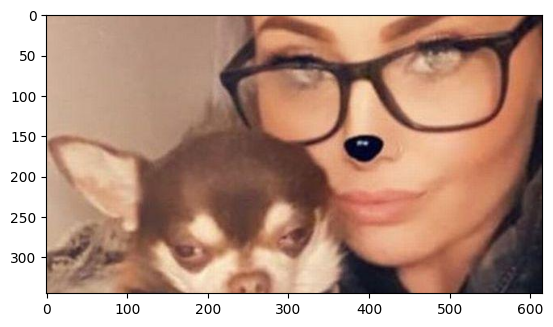

In [21]:
import random

random_image_path = random.choice(train_image_file_paths)

image = mpimg.imread(random_image_path)
plt.show()
plt.imshow(image)
random_image_path, image.ndim, image.shape

In [22]:
img_shapes = []
for i, image_file_path in enumerate(train_image_file_paths):
	image = mpimg.imread(image_file_path)
	img_shapes.append(image.shape + (i,))

img_shapes.sort()

In [23]:
len(img_shapes), img_shapes[-10:], img_shapes[:10]

(4733,
 [(3277, 2500, 3, 1541),
  (3458, 3498, 3, 2933),
  (3692, 3747, 3, 1835),
  (3888, 2592, 3, 2144),
  (4000, 3000, 3, 3864),
  (4000, 3000, 3, 4490),
  (4032, 3024, 3, 59),
  (4032, 3024, 3, 2056),
  (4032, 3024, 3, 2389),
  (4032, 3024, 3, 4091)],
 [(129, 389, 3, 2586),
  (129, 389, 3, 3693),
  (135, 372, 3, 2222),
  (138, 364, 3, 1376),
  (140, 359, 3, 4005),
  (146, 345, 3, 3697),
  (147, 343, 3, 1901),
  (150, 150, 3, 1396),
  (150, 150, 3, 3704),
  (150, 200, 3, 2592)])

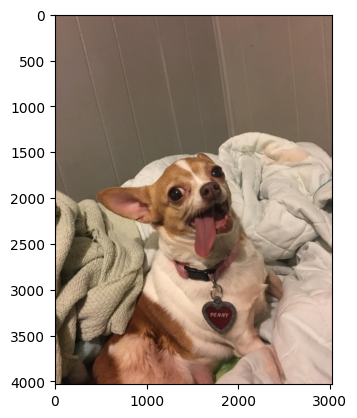

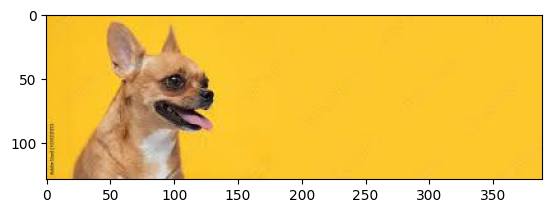

In [24]:
biggest_image = mpimg.imread(train_image_file_paths[4091])
plt.show()
plt.imshow(biggest_image)

smallest_image = mpimg.imread(train_image_file_paths[2586])
plt.show()
plt.imshow(smallest_image)

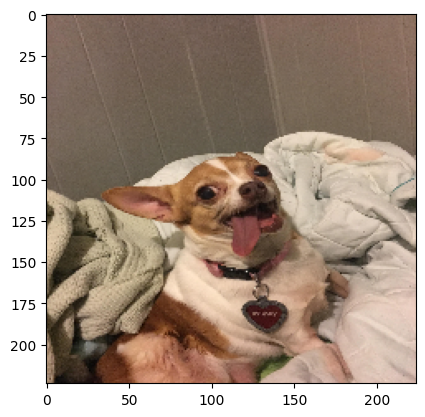

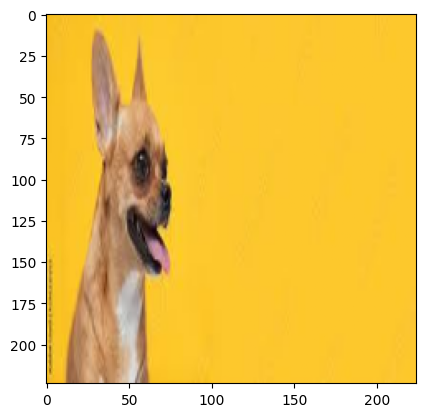

In [25]:
tensor_biggest_image_downscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[224, 224],
    # method=tf.image.ResizeMethod.BILINEAR,
    # preserve_aspect_ratio=False,
    # antialias=False,
    # name=None
)

tensor_smallest_image_downscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[224, 224]
)

plt.imshow(tensor_biggest_image_downscaled)
plt.show()

plt.imshow(tensor_smallest_image_downscaled)
plt.show()

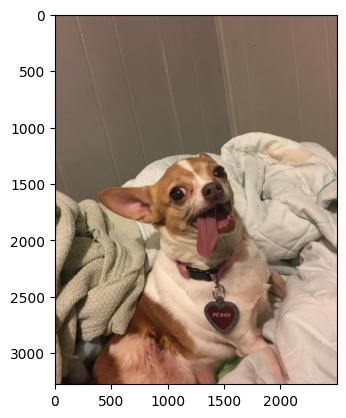

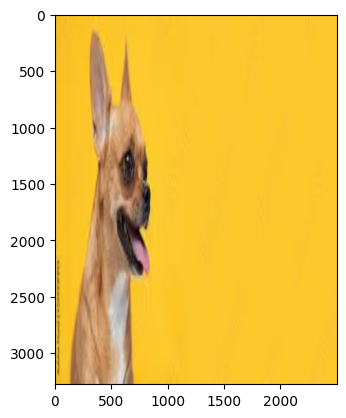

In [26]:
tensor_biggest_image_upscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[3277, 2500]
)

tensor_smallest_image_upscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[3277, 2500]
)

plt.imshow(tensor_biggest_image_upscaled)
plt.show()

plt.imshow(tensor_smallest_image_upscaled)
plt.show()


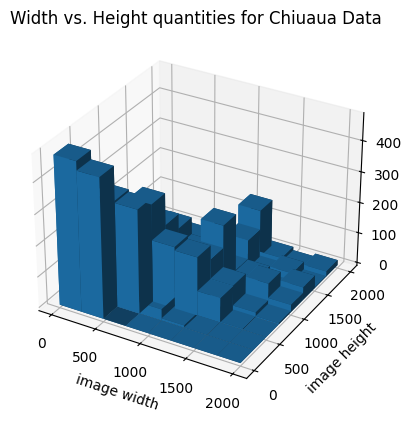

In [27]:
# https://stackoverflow.com/questions/52385299/plot-a-3d-bar-histogram

import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# !pip install ipympl
# %matplotlib widget

# To generate some test data
# x = np.random.randn(500)
# y = np.random.randn(500)
x = [shape[0] for shape in img_shapes]
y = [shape[1] for shape in img_shapes]

XY = np.stack((x,y),axis=-1)

def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

limitXY=[[0, 2000],[0, 2000]]
XY_select = selection(XY, limitXY=limitXY)


# xAmplitudes = np.array(XY_select)[:,0]#your data here
# yAmplitudes = np.array(XY_select)[:,1]#your other data here

# xAmplitudes = [shape[0] for shape in img_shapes]
# yAmplitudes = [shape[1] for shape in img_shapes]


fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(8,8), range =limitXY) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

# cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
# max_height = np.max(dz)   # get range of colorbars so we can normalize
# min_height = np.min(dz)
# # scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title("Width vs. Height quantities for Chiuaua Data")
plt.xlabel("image width")
plt.ylabel("image height")
# plt.savefig("Your_title_goes_here")
plt.show()


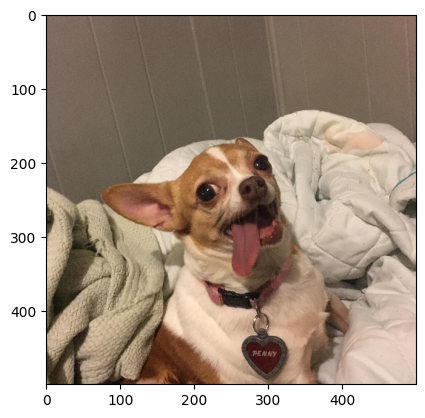

In [28]:
import tensorflow.keras.layers as layers

IMG_SIZE = 500

input_layer = tf.keras.Sequential([
	# layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="input_layer"),
	layers.Resizing(
		IMG_SIZE, IMG_SIZE, 
		crop_to_aspect_ratio=True, 
		name="resize"
	),
	layers.Rescaling(1 / 255, name="rescale"),
], name="input_layer")

# input_layer.build()

input_image = input_layer(biggest_image)

input_image.shape, biggest_image.shape

plt.imshow(input_image)
plt.show()

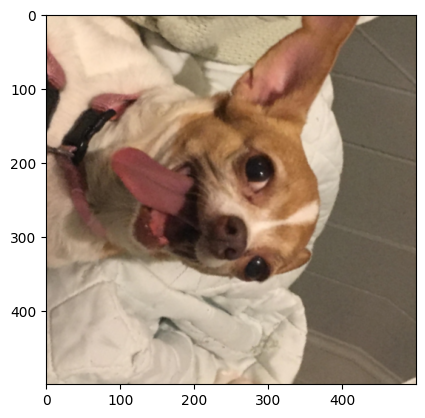

In [29]:
augmenting_layer = tf.keras.Sequential([
	layers.RandomFlip(0.5, name="flip"),
	layers.RandomZoom(0.5, name="zoom"),
	layers.RandomRotation(0.5, name="rotate")
], name="aug_layer")

# augmenting_layer.build()

augmented_image = augmenting_layer(input_image)

augmented_image.shape, input_image.shape

plt.imshow(augmented_image)
plt.show()

In [30]:
expanded_augmented_image = tf.expand_dims(augmented_image, 0)
expanded_augmented_image.shape

TensorShape([1, 500, 500, 3])

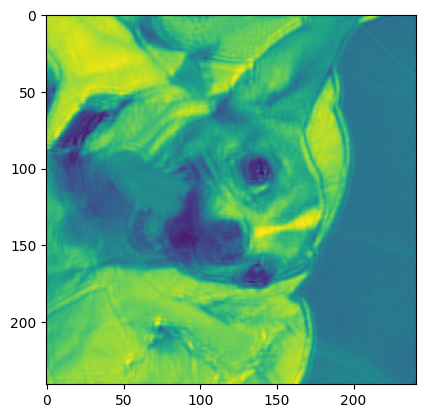

In [31]:
convolution_layer = tf.keras.Sequential([
	layers.Conv2D(filters=10, kernel_size=10, name="conv_1"),
	layers.Conv2D(filters=10, kernel_size=10, name="conv_2"),
	layers.MaxPool2D(name="pool"),
], name="conv_layer")

convoluted_image = convolution_layer(expanded_augmented_image)

convoluted_image.shape, augmented_image.shape

plt.imshow(tf.squeeze(convoluted_image)[:,:,0])
plt.show()

In [32]:
# inputs = layers.Input(shape=(500, 500, 3), name="input_layer")

model = tf.keras.Sequential()

model.add(input_layer)
model.add(augmenting_layer)
model.add(convolution_layer)
# x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Sequential)        │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aug_layer (Sequential)          │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer (Sequential)         │ ?                      │        13,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,020 (50.86 KB)

 Trainable params: 13,020 (50.86 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
	"train",
	label_mode="categorical",
	image_size=(IMG_SIZE, IMG_SIZE)
)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(
	"test",
	label_mode="categorical",
	image_size=(IMG_SIZE, IMG_SIZE),
	shuffle=False
)

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [16]:
# model.compile()

# # model.fit(train_data)
# # model.predict(train_data)

In [34]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

In [35]:
tf.config.list_physical_devices('GPU')

[]

In [37]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [18]:
history = model.fit(
	train_data,
	epochs=1, 
	validation_data=test_data,
	validation_steps=int(0.15 * len(test_data))
)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional" is incompatible with the layer: expected shape=(None, 3024, 3), found shape=(None, 500, 500, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 500, 500, 3), dtype=float32, sparse=None, name=keras_tensor_12>',)
  • kwargs={'mask': 'None'}

In [ ]:
model_2 = tf.keras.Sequential([
	layers.Resizing(
		IMG_SIZE, IMG_SIZE, 
		crop_to_aspect_ratio=True, 
		name="resize"
	),
	layers.Rescaling(1 / 255, name="rescale"),

	layers.RandomFlip(0.5, name="flip"),
	layers.RandomZoom(0.5, name="zoom"),
	layers.RandomRotation(0.5, name="rotate"),

	layers.Conv2D(filters=10, kernel_size=10, name="conv_1"),
	layers.Conv2D(filters=10, kernel_size=10, name="conv_2"),
	layers.MaxPool2D(name="pool"),

	layers.Flatten(),
	layers.Dense(1, activation="sigmoid")
], name="conv_layer")

model_2.compile(
	loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

history = model_2.fit(
	train_data,
	epochs=5, 
	validation_data=test_data,
	validation_steps=int(0.15 * len(test_data))
)


Epoch 1/5


  3/148 ━━━━━━━━━━━━━━━━━━━━ 1:20:28 33s/step - accuracy: 0.3229 - loss: 62.2539

In [ ]:
model_2.summary()

Model: "conv_layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resize (Resizing)               │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescale (Rescaling)             │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flip (RandomFlip)               │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotate (RandomRotation)         │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 491, 491, 10)   │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 482, 482, 10)   │        10,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool (MaxPooling2D)             │ (None, 241, 241, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 580810)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,020 (50.86 KB)

 Trainable params: 13,020 (50.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
241*241

58081